# Тема “Обучение без учителя”

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [17]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [19]:
data = boston['data']
target = boston["target"]
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
target = boston["target"]

Y = pd.DataFrame(target, columns=["price"])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [27]:
stnd_scaler = StandardScaler()

X_train_scaled = pd.DataFrame(stnd_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(stnd_scaler.transform(X_test), columns=X_test.columns)

In [31]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [32]:
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

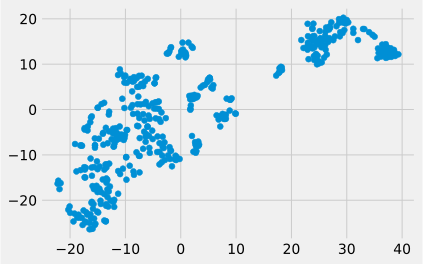

In [33]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [36]:
from sklearn.cluster import KMeans

In [48]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = model.fit_predict(X_train_scaled)
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

Text(-10, -25, 'кластер 3')

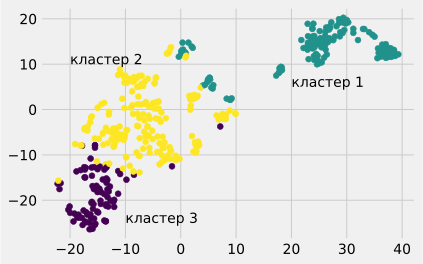

In [76]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(20, 5, 'кластер 1')
plt.text(-20, 10, 'кластер 2')
plt.text(-10, -25, 'кластер 3')

In [68]:
Y_train.mean()

prc    22.796535
dtype: float64

In [69]:
Y_train[labels_train == 0].mean()

prc    27.788372
dtype: float64

In [72]:
Y_train[labels_train == 1].mean()

prc    16.165354
dtype: float64

In [74]:
Y_train[labels_train == 2].mean()

prc    24.958115
dtype: float64

In [84]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534886

In [85]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196853

In [86]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.42166020942408367